Descrição das variáveis:

Nota 1: 1 dL, ou 1 decilitro, equivale a 100 mL (mililitros) ou 0,1 L (litros).

Nota 2: UI, ou unidades internacionais, são unidades de medida utilizadas para quantificar o efeito/atividade biológica de uma substância.

Sex representa o sexo do indivíduo - masculino ou feminino.

Height representa a altura do indivíduo, em incrementos de 5cm.

Weight representa o peso do indivíduo, em incrementos de 5kg.

Waist representa a circunferência da cintura do indivíduo.

Sight_left representa a acuidade visual do olho esquerdo do indivíduo. A acuidade visual mede a capacidade do olho de distinguir formas e detalhes de objetos a uma determinada distância. Isso varia de 0,1 a 2,5, com valores <0,1 sendo deslocados para 0,1.

Sight_right representa a acuidade visual do olho direito do indivíduo.

Hear_esquerda mede a audição no ouvido esquerdo do indivíduo, sendo 1 representando normal e 2 representando anormal.

Hear_right  mede a audição no ouvido direito do indivíduo com o mesmo sistema de classificação de listen_left.

A SBP  mede a maior pressão arterial sistólica medida do indivíduo, em mmHg. A pressão arterial sistólica mede a pressão nas artérias quando o coração bate.

A DBP  mede a pressão arterial diastólica medida do indivíduo, em mmHg. A pressão arterial diastólica mede a pressão nas artérias quando o coração descansa entre os batimentos.

O BLDS mede a glicemia em jejum do indivíduo, em mg/dL. Isso representa a concentração de glicose por 100ml de sangue antes de uma refeição.

Tot_chole mede a concentração total de colesterol (éster e não éster) no indivíduo, em mg/dL.

HDL_chole mede a concentração total de colesterol na região HDL (lipoproteína de alta densidade) do indivíduo, em mg/dL. O colesterol HDL, também chamado de colesterol bom, absorve o colesterol no sangue e o transporta de volta ao fígado, que então o elimina do corpo. Observe que valores mais elevados de colesterol HDL podem diminuir o risco de doenças cardíacas.

LDL_chole mede a concentração total de colesterol na região LDL (lipoproteína de baixa densidade), em mg/dL. O colesterol LDL, também chamado de colesterol ruim, constitui a maior parte do colesterol do corpo. Altos níveis disso podem aumentar o risco de doenças cardíacas e derrames.

Triglyceride mede a concentração total de triglicerídeos no sangue do indivíduo, em mg/dL. Os triglicerídeos são um tipo de lipídios (ou seja, gordura) que circulam no sangue e geralmente se originam dos alimentos que consumimos.

A hemoglobin  mede a concentração total de hemoglobina no sangue do indivíduo, em g/dL. A hemoglobina é uma proteína dos nossos glóbulos vermelhos que transporta oxigênio.

Urine_protein mede a quantidade de proteína na urina do indivíduo. Altos níveis de proteína na urina, ou proteinúria, podem ser um sinal de muitos problemas de saúde, como insuficiência cardíaca e problemas renais. Não está claro o que significam as codificações do rótulo (1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)) para esta variável, embora poderíamos especular que se refere à quantidade de desvios padrão da média em que o valor reside na distribuição de recursos.

Serum_creatine  mede a concentração de creatinina no soro do indivíduo (que reside no sangue), em mg/dL. A creatinina é um resíduo da creatina, produzida para fornecer energia principalmente aos músculos. Normalmente, isso é totalmente removido pelos rins; assim, se a função renal estiver anormal, a concentração de creatinina aumentará. Os valores normais estão em torno de 0,8-2,7 mg/dL.

SGOT_AST mede o valor SGOT (Glutamato-oxaloacetato transaminase) - AST (Aspartato transaminase) em UI/L, que são valores em exames de sangue que quantificam o desempenho do fígado, coração e outros órgãos. Em particular, quando estes estão danificados, o valor disto aumenta. Os valores normais estão em torno de 0-40 UI/L.

SGOT_ALT mede o valor SGOT (Glutamato-oxaloacetato transaminase) - ALT (Alanina transaminase) em UI/L, que são valores em exames de sangue que quantificam o desempenho do fígado. Principalmente quando estes estão danificados, seu valor aumenta. Os valores normais estão em torno de 0-40 UI/L.

Gama_GTP mede o valor de gama-GTP (y-glutamil transpeptidase) em UI/L, que são valores que quantificam a função hepática no dict biliar. Os valores normais são cerca de 11-63 UI/L para homens e 8-35 UI/L para mulheres.

SMK_STAT_TYPE_CD mede o estado de fumar do indivíduo, onde 1 corresponde a nunca ter fumado, 2 corresponde a ter fumado mas desistido e 3 corresponde a ainda fumar.

DRK_YN é uma bandeira que indica se o indivíduo bebe ou não.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb

In [2]:
df = pd.read_csv('smoking_driking.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
df[df.isnull().any(axis=1)]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df[df.isnull().any(axis=1)]
df.dropna()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
from sklearn.preprocessing import LabelEncoder

#Encodando colunas OBJECT
label_encoder = LabelEncoder()

df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [7]:
#Categorizando idades

bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [8]:
#Criando coluna BMI (Weight/Height)

df['bmi'] = df['weight'] / (df['height'] ** 2)

In [9]:
#Criando coluna com cálculos BP_ratio

df['BP_ratio'] = df['SBP'] / df['DBP']

In [10]:
#Criando coluna Cholesterol Ratios

df['HDL_ratio'] = df['HDL_chole'] / df['tot_chole']
df['LDL_ratio'] = df['LDL_chole'] / df['tot_chole']

In [11]:
#Criando coluna Health Risk Indicators

high_bp_threshold_sbp=140
high_bp_threshold_dbp=90
high_chol_threshold=240
high_ldl_threshold = 130

df['High_Blood_Pressure'] = ((df['SBP'] > high_bp_threshold_sbp) | (df['DBP'] > high_bp_threshold_dbp)).astype(int)
df['High_Total_Cholesterol'] = (df['tot_chole'] > high_chol_threshold).astype(int)
df['High_LDL_Cholesterol'] = (df['LDL_chole'] > high_ldl_threshold).astype(int)

In [12]:
def improved_boxplot(df, cols_to_plot=None, figsize=(15, 8)):
  """
  Creates an improved boxplot for multiple columns in a DataFrame.

  Args:
      df: pandas DataFrame.
      cols_to_plot: list of column names to plot (optional).
                   If None, plots all numerical columns.
      figsize: tuple specifying the figure size (width, height).

  Returns:
      None. Displays the boxplot.
  """

  if cols_to_plot is None:
    cols_to_plot = df.select_dtypes(include=np.number).columns.tolist()

  num_cols = len(cols_to_plot)
  num_rows = (num_cols + 4) // 5  # Calculate number of rows, max 5 cols per row

  fig, axes = plt.subplots(num_rows, min(num_cols, 5), figsize=figsize)
  axes = axes.flatten()  # Flatten axes for easier iteration

  for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')  # Remove y-axis label for cleaner look

  # Hide any unused subplots
  for j in range(i + 1, len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

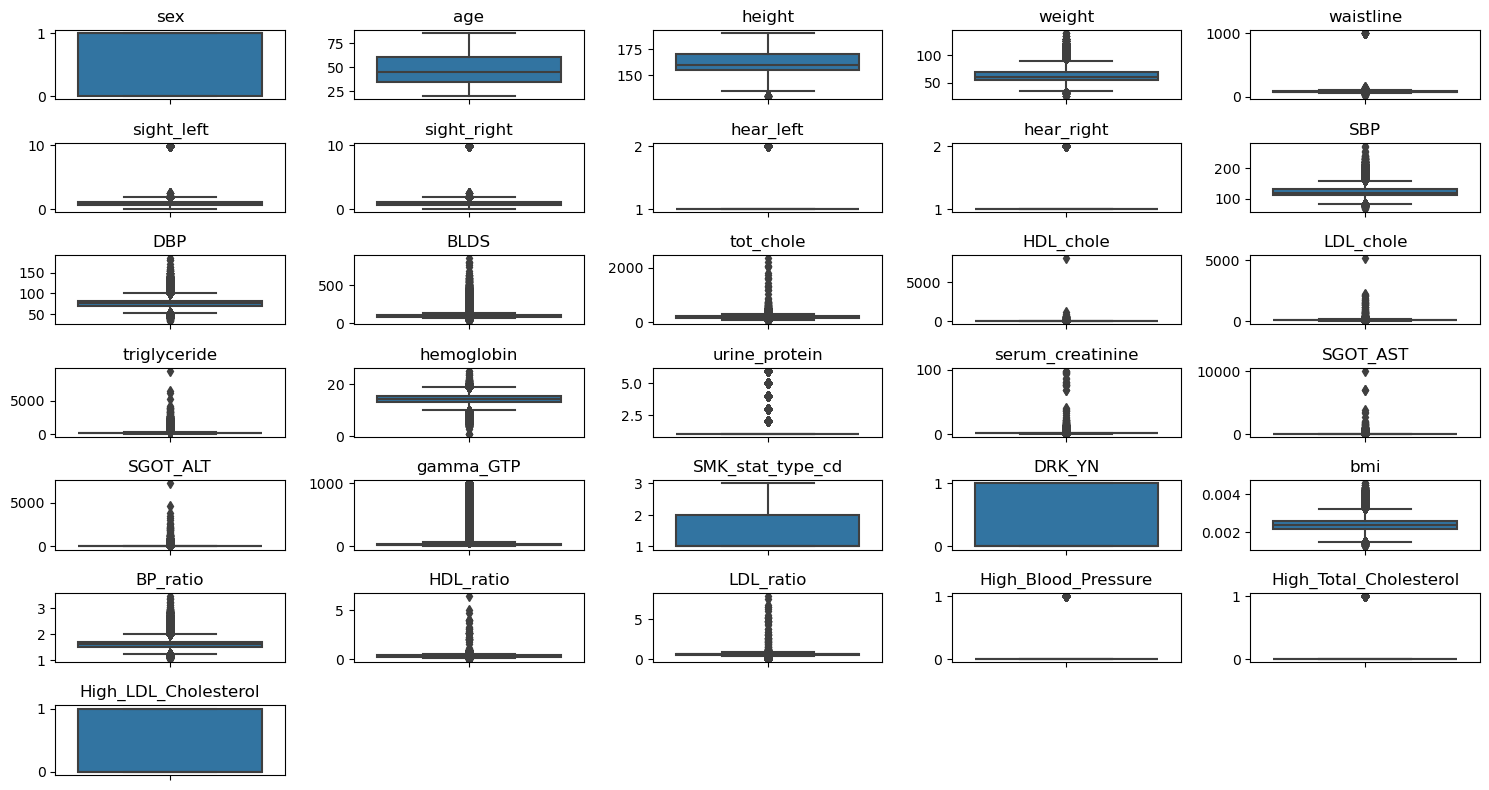

In [13]:
improved_boxplot(df)

In [14]:
def remove_outliers_iqr_to_nan(df, column_list):
    """
    Remove outliers from specified columns in a DataFrame using the IQR method.
    Replaces outliers with NaN values.

    Args:
        df: pandas DataFrame.
        column_list: list of column names to remove outliers from.

    Returns:
        pandas DataFrame with outliers replaced by NaN.
    """

    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan

    return df

In [15]:
df_limpo = remove_outliers_iqr_to_nan(df, df.select_dtypes(include=np.number).columns.tolist())

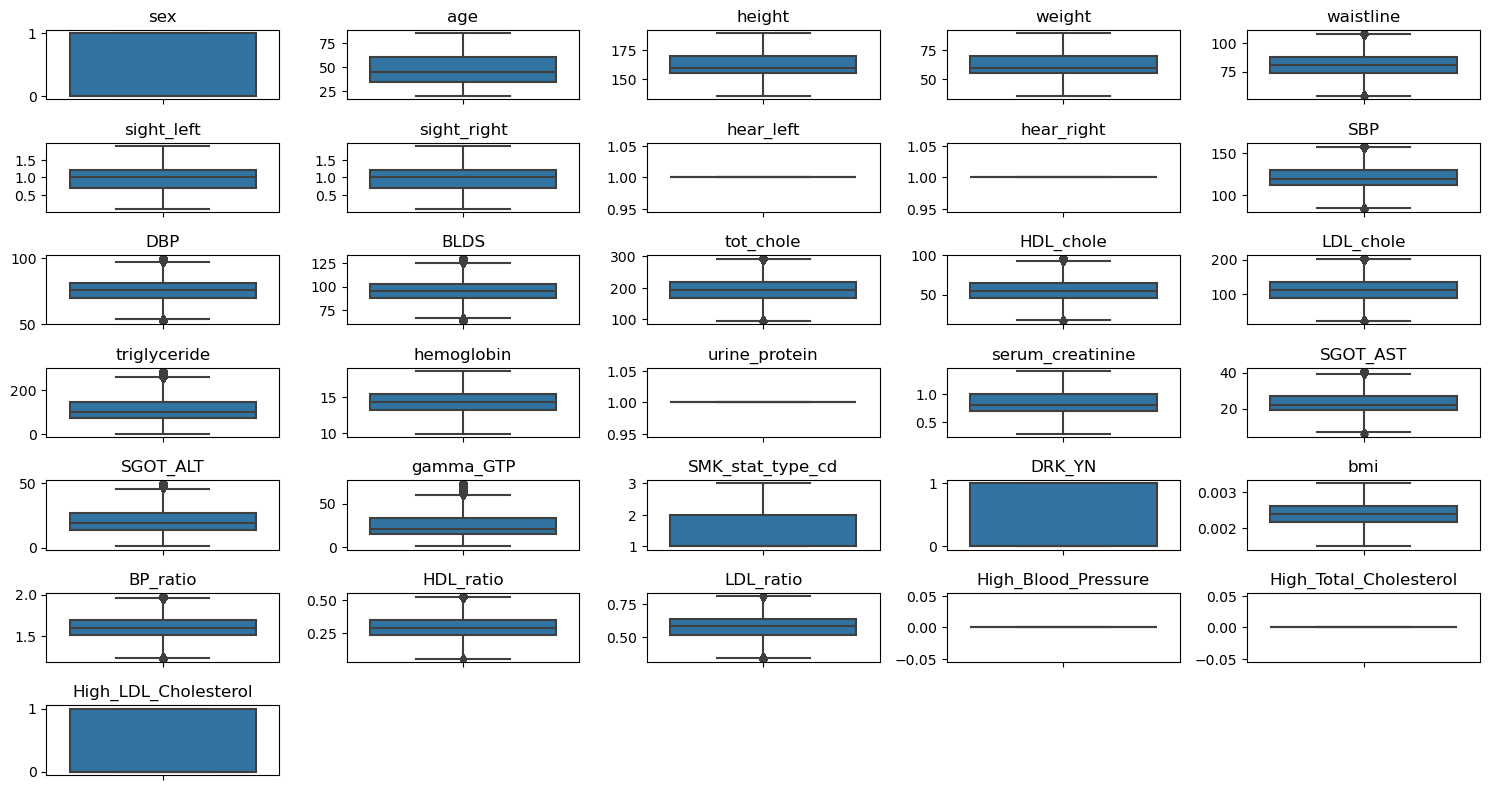

In [16]:
improved_boxplot(df)

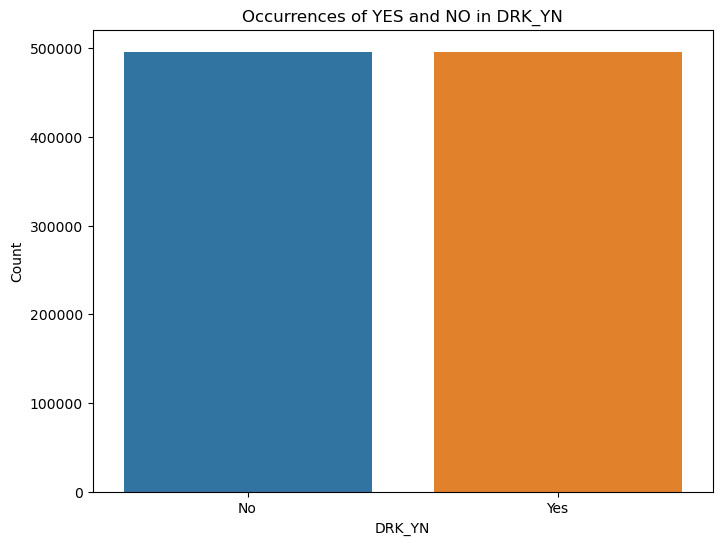

In [17]:
count=df['DRK_YN'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values)
plt.title('Occurrences of YES and NO in DRK_YN')
plt.xlabel('DRK_YN')
plt.ylabel('Count')
plt.xticks(count.index, ["No", "Yes"])
plt.show()

In [18]:
df_cleaned = df.dropna(subset=['hear_left', 'hear_right', 'urine_protein'])

In [19]:
label_encoder = LabelEncoder()
df_cleaned['age_group_encoded'] = label_encoder.fit_transform(df_cleaned['age_group'])

C:\Users\sande\AppData\Local\Temp\ipykernel_17220\1118903007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group_encoded'] = label_encoder.fit_transform(df_cleaned['age_group'])


In [20]:
features = ['DRK_YN', 'bmi', 'sex', 'SMK_stat_type_cd', 'hemoglobin',
            'gamma_GTP', 'serum_creatinine','waistline', 'SGOT_ALT', 'triglyceride', 'SGOT_AST',
            'HDL_ratio','LDL_ratio', 'BLDS', 'BP_ratio', 'age_group_encoded', 'High_Blood_Pressure', 'High_Total_Cholesterol', 'High_LDL_Cholesterol']

In [21]:
df_selected = df_cleaned[features]

In [22]:
from sklearn.impute import SimpleImputer as imputer

# Definir variável alvo (target) e variáveis preditoras (features)
X = df_selected.drop('DRK_YN', axis=1)  # Variáveis preditoras
y = df_selected['DRK_YN']  # Variável alvo

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove rows with missing values from X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping rows

# Create an instance of SimpleImputer
imputer_instance = imputer() #Creating an instance of the imputer

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer_instance.fit_transform(X_train) #Calling the method on the instance
X_test = imputer_instance.transform(X_test)

# Continue with model training:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

D:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusão:
[[64486 23995]
 [28122 62186]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71     88481
         1.0       0.72      0.69      0.70     90308

    accuracy                           0.71    178789
   macro avg       0.71      0.71      0.71    178789
weighted avg       0.71      0.71      0.71    178789



In [23]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [27]:
df_cleaned.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,DRK_YN,age_group,bmi,BP_ratio,HDL_ratio,LDL_ratio,High_Blood_Pressure,High_Total_Cholesterol,High_LDL_Cholesterol,age_group_encoded
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,1.0,30-40,0.002595,1.500000,0.248705,0.652850,0.0,0.0,0.0,1
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,0.0,30-40,0.002469,1.585366,0.241228,0.649123,0.0,0.0,1.0,1
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,0.0,40-50,0.002755,1.714286,0.301471,0.544118,0.0,0.0,0.0,2
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,0.0,50-60,0.002612,1.666667,0.378109,0.517413,NaN,0.0,0.0,3
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,0.0,50-60,0.002204,1.682927,0.306533,0.587940,0.0,0.0,0.0,3


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893944 entries, 0 to 991345
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   sex                     893944 non-null  float64 
 1   age                     893944 non-null  float64 
 2   height                  893887 non-null  float64 
 3   weight                  876654 non-null  float64 
 4   waistline               890178 non-null  float64 
 5   sight_left              883508 non-null  float64 
 6   sight_right             884554 non-null  float64 
 7   hear_left               893944 non-null  float64 
 8   hear_right              893944 non-null  float64 
 9   SBP                     881068 non-null  float64 
 10  DBP                     882724 non-null  float64 
 11  BLDS                    842284 non-null  float64 
 12  tot_chole               884160 non-null  float64 
 13  HDL_chole               881351 non-null  float64 
 14  LDL_

In [36]:
example_data = pd.DataFrame({
    'DRK_YN': [1.0],  # Assuming 1 for Yes, 0 for No
    'bmi': [22.5],
    'sex': [1.0],  # Assuming 1 for male and 0 for female
    'SMK_stat_type_cd': [1.0],  # Assuming some encoding for smoking status
    'hemoglobin': [13.5],
    'gamma_GTP': [25.0],
    'serum_creatinine': [1.0],
    'waistline': [85.0],
    'SGOT_ALT': [22.0],
    'triglyceride': [150.0],
    'SGOT_AST': [20.0],
    'HDL_ratio': [1.0],
    'LDL_ratio': [1.0],
    'BP_ratio': [1.5],
    'age_group_encoded': [1],  # Assuming this is already encoded
    'High_Blood_Pressure': [0.0],  # Assuming binary encoding (0 or 1)
    'High_Total_Cholesterol': [1.0],  # Assuming binary encoding (0 or 1)
    'High_LDL_Cholesterol': [0.0]  # Assuming binary encoding (0 or 1)
})


In [38]:
prediction = model.predict(example_data)

D:\Anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [40]:
print("Prediction:", prediction)

Prediction: [1.]
